<a href="https://colab.research.google.com/github/pbannuru/DEEP-LEARNING/blob/main/keras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 

In [2]:
tf.__version__ 

'2.8.2'

In [3]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
!nvidia-smi


Thu Oct  6 11:11:11 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
tf.keras.__version__

'2.8.0'

In [58]:
mnist = tf.keras.datasets.mnist

In [59]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [60]:
x_train.shape

(60000, 28, 28)

In [61]:
y_train.shape

(60000,)

In [62]:
img = x_train[0]
img.shape

(28, 28)

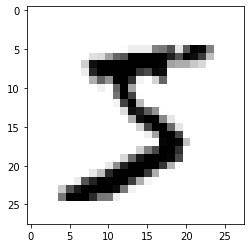

In [63]:
plt.imshow(img,cmap='binary')

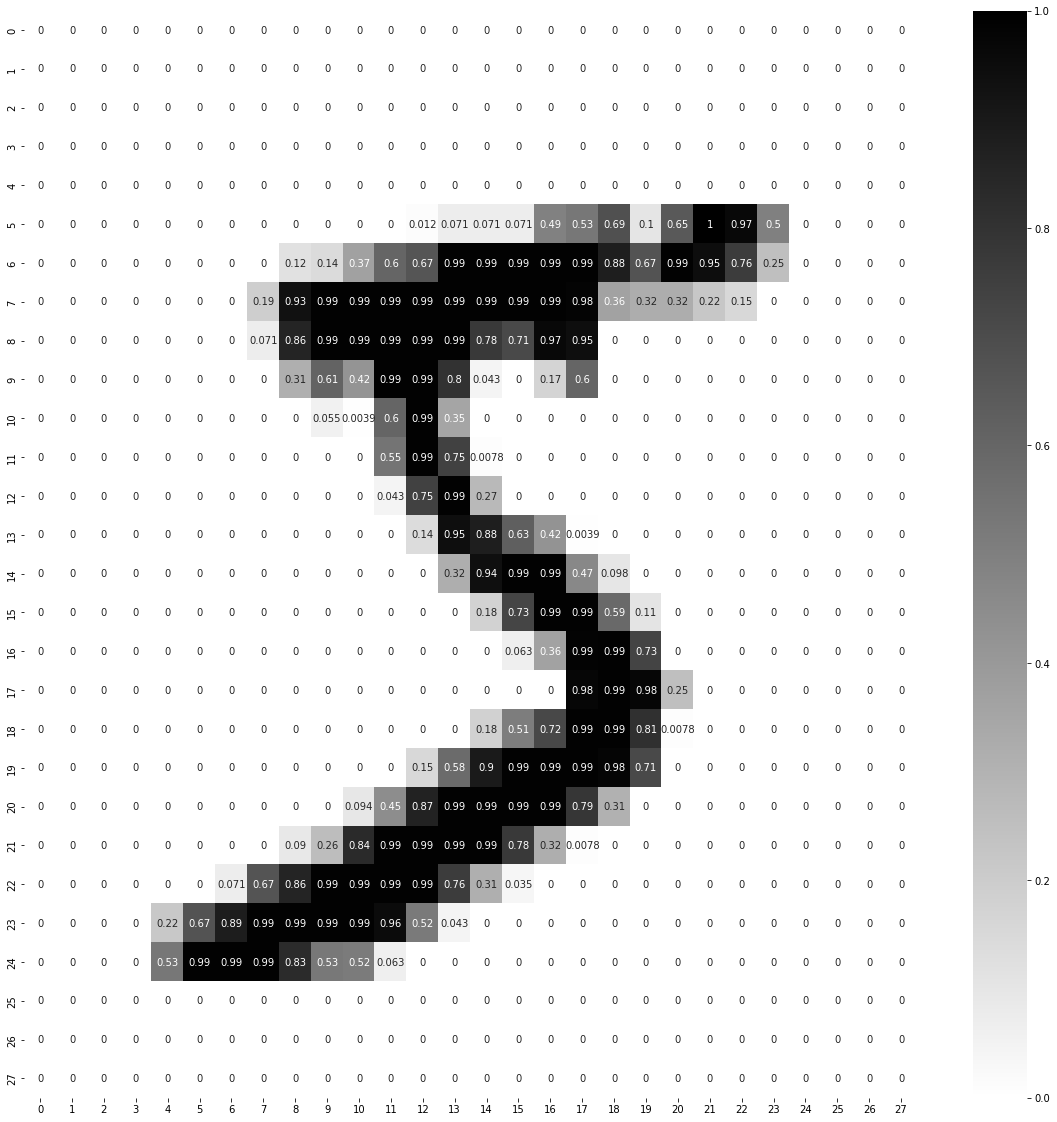

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(img/255,annot=True,cmap='binary')

In [64]:
# creating valid and training set
x_valid,x_train = x_train[:5000]/255,x_train[5000:]/255
y_valid,y_train = y_train[:5000],y_train[5000:]

x_test = x_test /255

In [65]:
x_train.shape


(55000, 28, 28)

In [66]:
y_train.shape

(55000,)

In [67]:
layers = [
    tf.keras.layers.Flatten(input_shape=(28,28),name='input_layer'),
    tf.keras.layers.Dense(300,activation='relu',name='HL'),
    tf.keras.layers.Dense(100,activation='relu',name='HL2'),
    tf.keras.layers.Dense(10,activation='softmax',name='ouput')
          ]

In [68]:
model =tf.keras.models.Sequential(layers) # for connecting all neurons in all layers

In [69]:
model.layers

In [70]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 HL (Dense)                  (None, 300)               235500    
                                                                 
 HL2 (Dense)                 (None, 100)               30100     
                                                                 
 ouput (Dense)               (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# 28*28=784 = input from matrix to flatten layer
# 784*300 weights+300 bias = 235500

# 300*100+100 =30100

In [71]:
weights,bias=model.layers[1].get_weights()

In [72]:
print(weights.shape)
print(bias.shape)

(784, 300)
(300,)


In [73]:
print(weights)


[[-0.07383358 -0.06817714 -0.02556529 ... -0.06386133 -0.0578846
   0.00618352]
 [-0.0380605  -0.07112798  0.04707094 ... -0.03552834 -0.06970416
   0.01268037]
 [ 0.0141694  -0.03374495  0.02267737 ...  0.05989501 -0.05312897
   0.0249399 ]
 ...
 [-0.03876621 -0.02801002  0.04222682 ... -0.00499682 -0.01294498
   0.04073145]
 [ 0.03228656  0.06737456 -0.030506   ... -0.04414773  0.00521193
  -0.03345572]
 [ 0.07085338 -0.06774159 -0.06542093 ... -0.00550283  0.07286425
  -0.03429694]]


In [36]:
print(bias)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [74]:
loss_function_ = "sparse_categorical_crossentropy"   # loss = y-y_hat
optimiser_ = "SGD"
metrics_=['accuracy']

model.compile(loss=loss_function_,
              optimizer=optimiser_,
              metrics=metrics_)

In [77]:
EPOCHS=30
validation = (x_valid,y_valid)
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=validation)  # after every epoch it will check result with validation data

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1863 - accuracy: 0.9470 - val_loss: 0.1655 - val_accuracy: 0.9528
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1643 - accuracy: 0.9534 - val_loss: 0.1494 - val_accuracy: 0.9590
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1461 - accuracy: 0.9584 - val_loss: 0.1391 - val_accuracy: 0.9604
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1316 - accuracy: 0.9625 - val_loss: 0.1246 - val_accuracy: 0.9642
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1198 - accuracy: 0.9662 - val_loss: 0.1187 - val_accuracy: 0.9668
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1100 - accuracy: 0.9694 - val_loss: 0.1128 - val_accuracy: 0.9688
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1011 - accuracy: 0.9721 - val_loss: 0.1056 - val_accuracy:

# ->55000/32=1719 batches (steps per epoch) , each has 32 images 
# ->32 is default

In [80]:
result_df=pd.DataFrame(history.history)

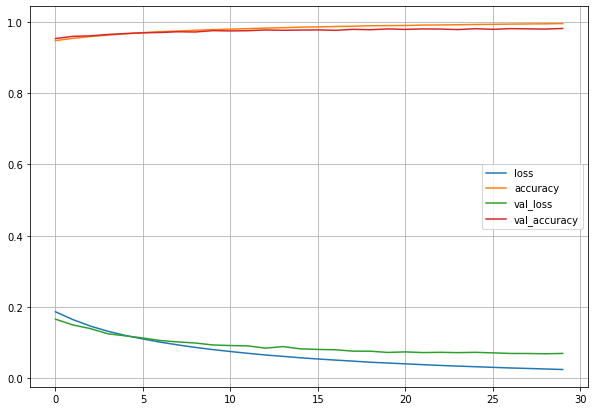

In [83]:
result_df.plot(figsize=(10,7))
plt.grid(True)
plt.show()

In [84]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9794


[0.06829407066106796, 0.9793999791145325]

In [86]:
x_test.shape[0]/32

312.5

In [87]:
model.save("test.h5")